# Машинное обучение, ФКН ВШЭ

## Практическое задание 7. Градиентный бустинг ~~своими руками~~

### Общая информация
Дата выдачи: 07.12.2018

Мягкий дедлайн: 05:59MSK 18.12.2018

Жесткий дедлайн: 05:59MSK 19.12.2018

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

__Задание 1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data). 
* Загрузите таблицу application_train.csv;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#data = pd.read_csv('application_train.csv')
data = pd.read_csv('../input/application_train.csv')

In [3]:
'''data = data[:1000]'''

'data = data[:1000]'

In [4]:
Y = data['TARGET']
data.drop(columns=['SK_ID_CURR', 'TARGET'], inplace = True)


In [5]:
cats = []
for col in data.columns:
    if len(data[col].unique()) <= 60: # подбор по некст 2 ячейкам
        cats.append(col)
print(cats)
print(len(cats))

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_

In [6]:
len(data['ORGANIZATION_TYPE'].unique())

58

In [7]:
for col in data.columns:
    if col in cats:
        data[col] = data[col].astype('str')
        data[col].fillna('-1', inplace=True)
    else:
        print(col)
        data[col] = data[col].astype('float64')
        data[col].fillna(-1.0, inplace=True)

AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
TOTALAREA_MODE
DAYS_LAST_PHONE_CHANGE


In [8]:
data

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,-1.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,...,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,-1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-1.000000,...,-1.0000,-1.0000,-1.0000,-1.0000,nan,nan,-1.0000,nan,nan,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,-1.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,-1.000000,...,-1.0000,-1.0000,-1.0000,-1.0000,nan,nan,-1.0000,nan,nan,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,-1.0,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1.000000,...,-1.0000,-1.0000,-1.0000,-1.0000,nan,nan,-1.0000,nan,nan,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941.0,-1588.0,-4970.0,-477.0,-1.0,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,-1.000000,...,-1.0000,-1.0000,-1.0000,-1.0000,nan,nan,-1.0000,nan,nan,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.30, random_state=0)

__Задание 2. (1.5 балла)__

Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров. 
Почему получилась заметная разница в качестве? 

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [10]:
#!pip install catboost lightgbm

In [11]:
reals = list(set(data.columns) - set(cats))

In [12]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import average_precision_score
aps = average_precision_score

In [13]:
%%time
catb = CatBoostClassifier()
catb.fit(X_train[reals], y_train, verbose=0)

CPU times: user 3min 45s, sys: 10.3 s, total: 3min 55s
Wall time: 1min 4s


In [14]:
print('Catboost quality {}'.format(aps(y_test, catb.predict_proba(X_test[reals])[:, 1])))

Catboost quality 0.228827201867013


In [15]:
%%time
lgbm = LGBMClassifier()
lgbm.fit(X_train[reals], y_train)

CPU times: user 14.5 s, sys: 280 ms, total: 14.7 s
Wall time: 4.27 s


In [16]:
print('LGBM quality {}'.format(aps(y_test, (lgbm.predict_proba(X_test[reals])[:, 1]))))

LGBM quality 0.22657843814333786


Почему получилась заметная разница в качестве?
>Потому что катбуст обучался дольше, видимо по умолчанию число деревьев больше(не нашел параметров по умолчанию у catboost, но с verbose по дефолту дает тысячу, тогда как у LGBM их 100)

__Задание 3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

In [17]:
from sklearn.model_selection import GridSearchCV
# худшее дз за всю историю
params = {
    'n_estimators': [100, 300],
    'max_depth': [4, 8],
    'learning_rate': np.logspace(-2, -1, 2),
    'random_state': [0]
}

In [18]:
%%time
catb_gs = GridSearchCV(CatBoostClassifier(verbose=0), params, cv=3, scoring='average_precision', n_jobs=-1, verbose=3)
catb_gs.fit(X_train[reals], y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.7min finished


CPU times: user 57.8 s, sys: 3.32 s, total: 1min 1s
Wall time: 5min 2s


In [19]:
%%time
lgbm_gs = GridSearchCV(LGBMClassifier(), params, cv=3, scoring='average_precision', n_jobs=-1, verbose=5)
lgbm_gs.fit(X_train[reals], y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  2.1min remaining:   11.5s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.2min finished


CPU times: user 26.4 s, sys: 644 ms, total: 27 s
Wall time: 2min 16s


In [20]:
catb_grid = pd.DataFrame(catb_gs.cv_results_['params'])
catb_grid['val aps'] = catb_gs.cv_results_['mean_test_score']
catb_grid.drop(columns=['random_state'], inplace=True)
catb_grid.sort_values('val aps', ascending=False)

,learning_rate,max_depth,n_estimators,val aps
5,0.10,4,300,0.231962
6,0.10,8,100,0.227431
7,0.10,8,300,0.227307
4,0.10,4,100,0.224643
3,0.01,8,300,0.215878
1,0.01,4,300,0.208724
2,0.01,8,100,0.190742
0,0.01,4,100,0.187032


In [21]:
lgbm_grid = pd.DataFrame(lgbm_gs.cv_results_['params'])
lgbm_grid['val aps'] = lgbm_gs.cv_results_['mean_test_score']
lgbm_grid.drop(columns=['random_state'], inplace=True)
lgbm_grid.sort_values('val aps', ascending=False)

,learning_rate,max_depth,n_estimators,val aps
5,0.10,4,300,0.233013
4,0.10,4,100,0.230543
6,0.10,8,100,0.229790
7,0.10,8,300,0.227158
3,0.01,8,300,0.226192
1,0.01,4,300,0.217338
2,0.01,8,100,0.213751
0,0.01,4,100,0.202009


__Задание 4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов. 

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков. 

In [ ]:
X_train_oh = X_train[reals].copy()
X_test_oh = X_test[reals].copy()
for col in cats:
    buf = pd.get_dummies(pd.concat([X_train[col], X_test[col]], 0))
    #X_train_oh = pd.concat([X_train_oh, pd.get_dummies(X_train[col])], 1)
    #X_test_oh = pd.concat([X_test_oh, pd.get_dummies(X_test[col])], 1)
    n = len(X_train[col])
    X_train_oh = pd.concat([X_train_oh, buf[:n]], 1)
    X_test_oh = pd.concat([X_test_oh, buf[n:]], 1)
global_mean = y_train.mean()
C = 10
X_train_cnt = X_train[reals].copy()
X_test_cnt = X_test[reals].copy()
for col in cats:
    uniq = X_train[col].append(X_test[col]).unique()
    buf = np.repeat(np.array(y_train)[:, np.newaxis], len(uniq), axis=1)
    print(buf.shape, np.repeat(np.array(X_train[col])[:, np.newaxis], len(uniq), axis=1).shape, np.array(uniq)[np.newaxis, :].shape)
    buf = np.where(np.repeat(np.array(X_train[col])[:, np.newaxis], len(uniq), axis=1) == np.array(uniq)[np.newaxis, :], 1, 0)
    print(buf.shape)
    to_replace = (uniq, (np.logical_and(buf, (y_train == 1)[:, np.newaxis]).sum(axis=0) + C * global_mean) / (buf.sum(axis=0) + C))
    print(to_replace)
    X_train_cnt = pd.concat([X_train_cnt, X_train[col].replace(*to_replace)], 1)
    X_test_cnt = pd.concat([X_test_cnt, X_test[col].replace(*to_replace)], 1)

In [ ]:
X_test_cnt.dtypes[X_train_cnt.dtypes != 'float64']

In [ ]:
X_test_cnt

In [ ]:
#float(X_test_cnt['OCCUPATION_TYPE'][587])

In [ ]:
'''for col in X_test_cnt.columns:
    for j in X_test_cnt.index:
        try:
            kek = float(X_test_cnt[col][j])
        except Exception:
            print(col, j)'''

In [ ]:
%%time
catb_gs_oh = GridSearchCV(CatBoostClassifier(verbose=0), params, cv=3, scoring='average_precision', n_jobs=-1, verbose=3)
catb_gs_oh.fit(X_train_oh, y_train)

In [ ]:
%%time
lgbm_gs_oh = GridSearchCV(LGBMClassifier(), params, cv=3, scoring='average_precision', n_jobs=-1, verbose=3)
lgbm_gs_oh.fit(X_train_oh, y_train)

In [ ]:
%%time
catb_gs_cnt = GridSearchCV(CatBoostClassifier(verbose=0), params, cv=3, scoring='average_precision', n_jobs=-1, verbose=3)
catb_gs_cnt.fit(X_train_cnt, y_train)

In [ ]:
%%time
lgbm_gs_cnt = GridSearchCV(LGBMClassifier(), params, cv=3, scoring='average_precision', n_jobs=-1, verbose=3)
lgbm_gs_cnt.fit(X_train_cnt, y_train)

In [ ]:
cats_idx = []
for idx, cat in enumerate(X_train.columns):
    if cat in cats:
        cats_idx.append(idx)
len(cats_idx)

In [ ]:
%%time
catb_gs_orig = GridSearchCV(CatBoostClassifier(verbose=0, cat_features=cats_idx), params, cv=3, scoring='average_precision', n_jobs=-1, verbose=3)
catb_gs_orig.fit(X_train, y_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
X_train_le = X_train[reals].copy()
X_test_le = X_test[reals].copy()
#print(X_test_le)
le = LabelEncoder()
for col in cats:
    le.fit(pd.concat([X_train[col], X_test[col]], 0)) # иначе ругается на невиденные ранее метки
    X_train_le = pd.concat([X_train_le, pd.DataFrame(le.transform(X_train[col]), index = X_train_le.index)], 1)
    X_test_le = pd.concat([X_test_le, pd.DataFrame(le.transform(X_test[col]), index = X_test_le.index)], 1)

In [ ]:
X_test_le.head()

In [ ]:
%%time
lgbm_gs_orig = GridSearchCV(LGBMClassifier(categorical_feature=(cats_idx)), params, cv=3, scoring='average_precision', n_jobs=-1, verbose=3)
lgbm_gs_orig.fit(X_train_le, y_train)

In [ ]:
print('Catboost one hot quality {}'.format(aps(y_test, catb_gs_oh.predict_proba(X_test_oh)[:, 1])))
print('LGBM one hot quality {}'.format(aps(y_test, lgbm_gs_oh.predict_proba(X_test_oh)[:, 1])))
print('Catboost counter quality {}'.format(aps(y_test, catb_gs_cnt.predict_proba(X_test_cnt)[:, 1])))
print('LGBM counter quality {}'.format(aps(y_test, lgbm_gs_cnt.predict_proba(X_test_cnt)[:, 1])))
print('Catboost original quality {}'.format(aps(y_test, catb_gs_orig.predict_proba(X_test)[:, 1])))
print('LGBM original quality {}'.format(aps(y_test, lgbm_gs_orig.predict_proba(X_test_le)[:, 1])))

In [ ]:
One hot и оригинальное кодирование категориальных у catboost самые долгие, lgbm везде обучается примерно одиннакого

Короче все что было выше, отработало бы за 2 часа и дало бы:
Blending quality 0.24141479936436447  
  
Catboost one hot quality 0.23866081723226443 гдет 40 мин  
LGBM one hot quality 0.23939975445146294 5 мин  
Catboost counter quality 0.23697760038361756 40 мин  
LGBM counter quality 0.23990326218782523 5 мин  
Catboost original quality 0.23798214500408316 10 мин  
LGBM original quality 0.22227549983649827 5 мин  
  
кагел почему то решил сбросить весь мой аутпут, а обучить это все заного до дедлайна я не успею

__Задание 5. (1 балл)__

Реализуйте блендинг подобранных в предыдущем задании моделей и сравните качество.

In [ ]:
models = [catb_gs_oh, lgbm_gs_oh, catb_gs_cnt, lgbm_gs_cnt, catb_gs_orig, lgbm_gs_orig]
'''models_oh = [catb_gs_oh, lgbm_gs_oh]
models_cnt = [catb_gs_cnt, lgbm_gs_cnt]
models_le = [lgbm_gs_orig]'''
models_dict = {catb_gs_orig: 0, catb_gs_oh: 1, lgbm_gs_oh: 1, catb_gs_cnt: 2, lgbm_gs_cnt: 2, lgbm_gs_orig: 3}
def blend_predict_proba(X):#(x, x_oh, x_cnt, x_le):
    result = np.zeros((len(X[0]), 2))
    for m in models:
        result += m.predict_proba(X[models_dict[m]]) / len(models)
    return result
        
print('Blending quality {}'.format(aps(y_test, blend_predict_proba([X_test, X_test_oh, X_test_cnt, X_test_le])[:, 1])))

Blending quality 0.24141479936436447

Лучше всего предыдущего

__Задание 6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

In [26]:
print(catb_gs.best_estimator_.feature_importances_.shape)

(49,)


In [35]:
print(X_train[reals].columns)
print(catb_gs.best_estimator_.feature_importances_)

Index(['FLOORSMAX_AVG', 'APARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'BASEMENTAREA_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE',
       'AMT_GOODS_PRICE', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_MEDI', 'AMT_ANNUITY', 'TOTALAREA_MODE',
       'YEARS_BUILD_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'COMMONAREA_MODE',
       'BASEMENTAREA_MEDI', 'DAYS_EMPLOYED', 'YEARS_BEGINEXPLUATATION_AVG',
       'APARTMENTS_MODE', 'APARTMENTS_AVG', 'ELEVATORS_AVG', 'FLOORSMIN_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'ENTRANCES_AVG', 'LIVINGAPARTMENTS_MODE',
       'COMMONAREA_MEDI', 'DAYS_REGISTRATION', 'COMMONAREA_AVG',
       'BASEMENTAREA_AVG', 'NONLIVINGAREA_MODE', 'EXT_SOURCE_2', 'DAYS_BIRTH',
       'LIVINGAPARTMENTS_MEDI', 'LANDAREA_AVG', 'EXT_SOURCE_1',
       'YEARS_BUILD_MEDI', 'LIVINGAREA_MEDI', 'LANDAREA_MEDI',
   

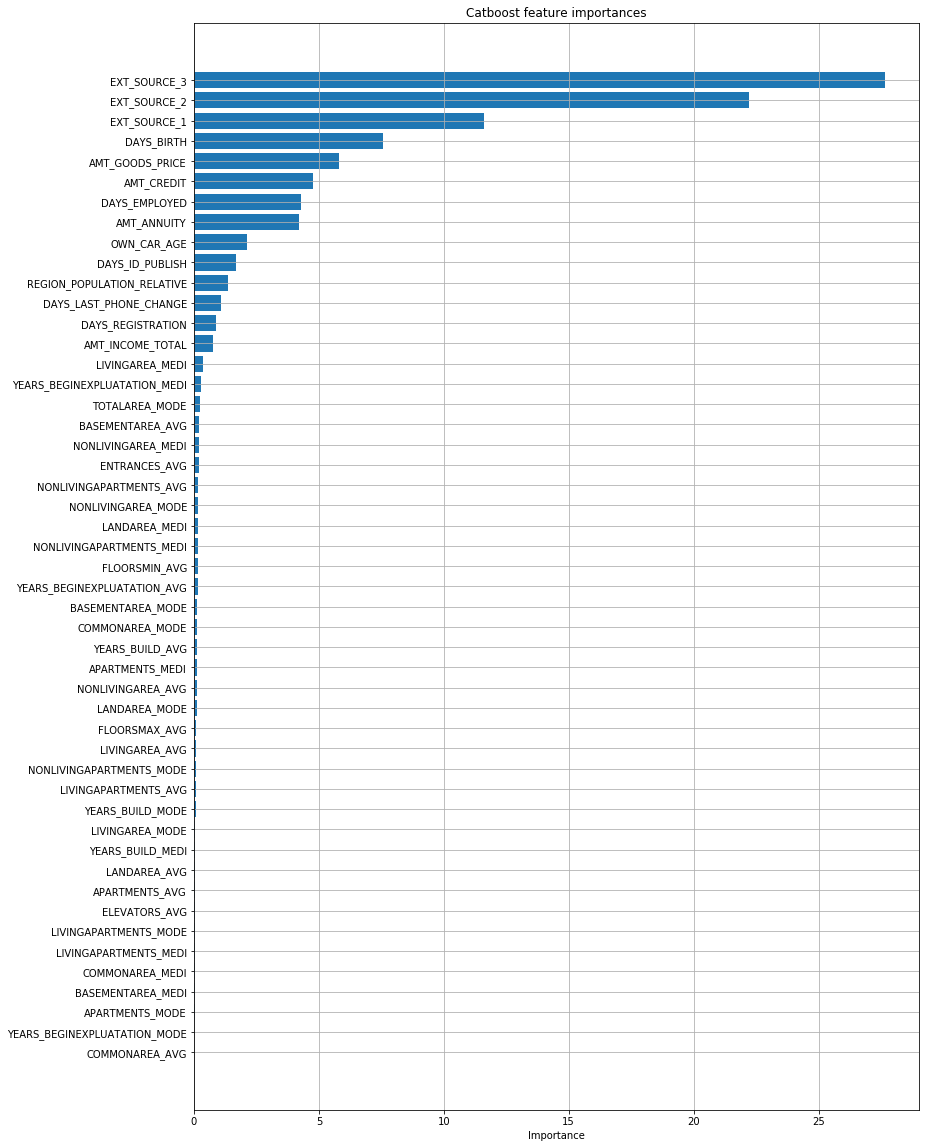

In [37]:
n = len(X_train[reals].columns)
idxs = np.argsort(catb_gs.best_estimator_.feature_importances_)
plt.figure(figsize=(13, 20))
plt.barh(np.arange(n), catb_gs.best_estimator_.feature_importances_[idxs], tick_label=X_train[reals].columns[idxs])
plt.yticks(np.arange(n))
plt.xlabel('Importance')
plt.title('Catboost feature importances')
plt.grid()

In [44]:
catb_important = X_train[reals].columns[catb_gs.best_estimator_.feature_importances_ > 0.5]

In [45]:
%%time
catb_gs = GridSearchCV(CatBoostClassifier(verbose=0), params, cv=3, scoring='average_precision', n_jobs=-1, verbose=3)
catb_gs.fit(X_train[catb_important], y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.8min finished


CPU times: user 38.7 s, sys: 2.6 s, total: 41.3 s
Wall time: 3min


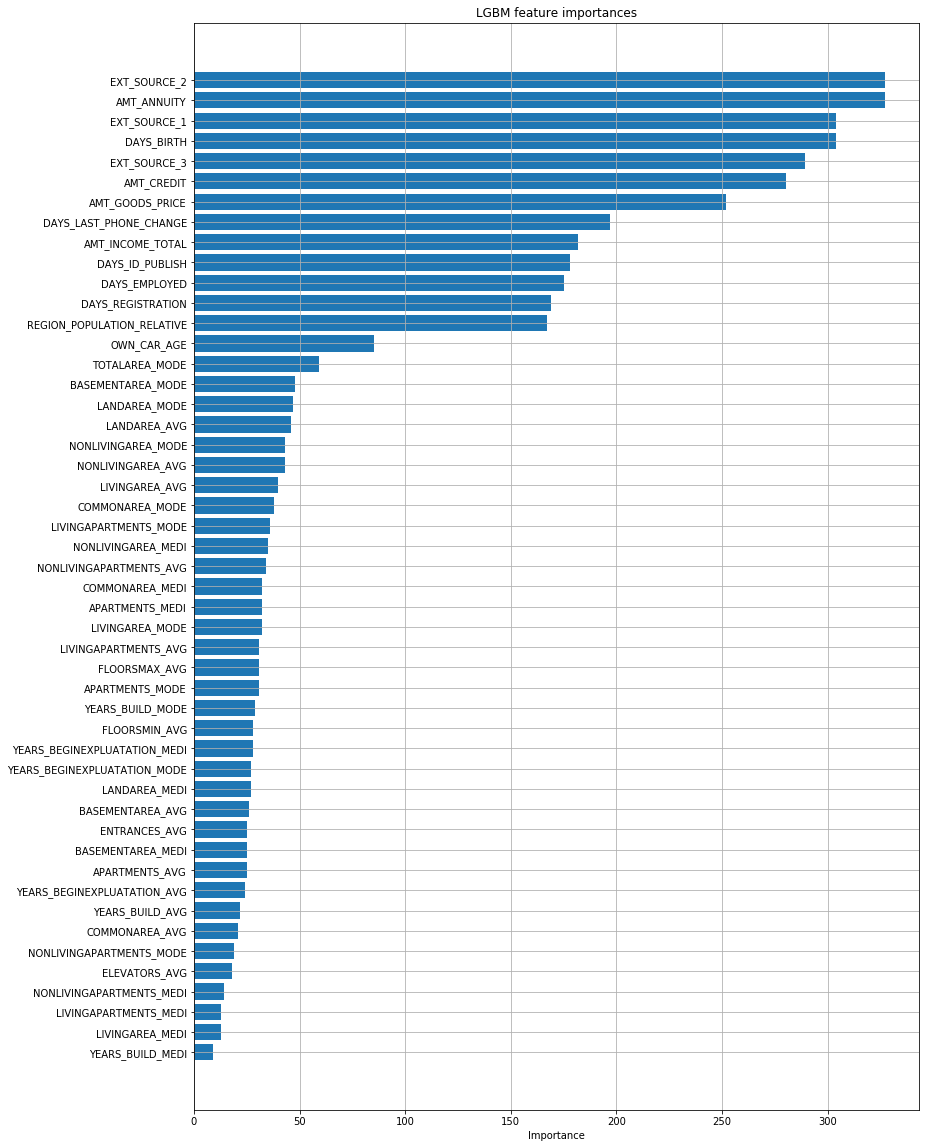

In [39]:
n = len(X_train[reals].columns)
idxs = np.argsort(lgbm_gs.best_estimator_.feature_importances_)
plt.figure(figsize=(13, 20))
plt.barh(np.arange(n), lgbm_gs.best_estimator_.feature_importances_[idxs], tick_label=X_train[reals].columns[idxs])
plt.yticks(np.arange(n))
plt.xlabel('Importance')
plt.title('LGBM feature importances')
plt.grid()

In [40]:
lgbm_important = X_train[reals].columns[lgbm_gs.best_estimator_.feature_importances_ > 50]

In [42]:
%%time
lgbm_gs = GridSearchCV(LGBMClassifier(), params, cv=3, scoring='average_precision', n_jobs=-1, verbose=5)
lgbm_gs.fit(X_train[lgbm_important], y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  1.1min remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.1min finished


CPU times: user 12.8 s, sys: 440 ms, total: 13.2 s
Wall time: 1min 9s


In [46]:
catb_grid = pd.DataFrame(catb_gs.cv_results_['params'])
catb_grid['val aps'] = catb_gs.cv_results_['mean_test_score']
catb_grid.drop(columns=['random_state'], inplace=True)
catb_grid.sort_values('val aps', ascending=False)

,learning_rate,max_depth,n_estimators,val aps
5,0.10,4,300,0.232202
6,0.10,8,100,0.227869
4,0.10,4,100,0.224884
7,0.10,8,300,0.224482
3,0.01,8,300,0.219552
1,0.01,4,300,0.209751
2,0.01,8,100,0.202264
0,0.01,4,100,0.191968


In [43]:
lgbm_grid = pd.DataFrame(lgbm_gs.cv_results_['params'])
lgbm_grid['val aps'] = lgbm_gs.cv_results_['mean_test_score']
lgbm_grid.drop(columns=['random_state'], inplace=True)
lgbm_grid.sort_values('val aps', ascending=False)

,learning_rate,max_depth,n_estimators,val aps
5,0.10,4,300,0.233428
6,0.10,8,100,0.230747
4,0.10,4,100,0.230655
7,0.10,8,300,0.227126
3,0.01,8,300,0.226101
1,0.01,4,300,0.216990
2,0.01,8,100,0.213121
0,0.01,4,100,0.201885


Как видим, качество изменилось не сильно